<img src="IMS_logo.PNG" align="right" style="width: 120px;"/>


# <center>Machine Learning</center>
##  Group 21 Project  
### Done By: 
> ###  - Nuno Rosário - M20190482 - M20190482@novaims.unl.pt
> ###  - Philipp  Tueschen - M20180391 - M20180391@novaims.unl.pt
> ###  - Ricardo Gonçalves - M20190211 - M20190211@novaims.unl.pt
> ###  - Sofia Grifo - M20190795 - M20190795@novaims.unl.pt

---

<div class="alert alert-block alert-info">
    
# Table of Content<a class="anchor"><a id='toc'></a></b><br>
* [<font color='#E8800A'>Resources</font>](#first-bullet)<br>
- [<font color='#E8800A'>Data</font>](#second-bullet)<br>
- [<font color='#E8800A'>Functions</font>](#third-bullet)<br>
- [<font color='#E8800A'>Evaluation</font>](#fourth-bullet)<br>
- [<font color='#E8800A'>Development Method</font>](#fifth-bullet)<br>  
- [<font color='#E8800A'>Explore</font>](#sixth-bullet) <br>
- [<font color='#E8800A'>Modify</font>](#eighth-bullet)<br>
- [<font color='#E8800A'>Model</font>](#nineth-bullet)<br>
- [<font color='#E8800A'>Access</font>](#tenth-bullet)<br>  
- [<font color='#E8800A'>Predicting Test set</font>](#eleventh-bullet)<br>  
</div>


## <font color='#E8800A'>Resources</font> <a class="anchor" id="first-bullet"></a>
  [Back to TOC](#toc)

## Imports

In [90]:
from datetime import date
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
!pip install Boruta
from boruta import BorutaPy
from sklearn.feature_selection import RFE
!pip install imblearn
from imblearn.over_sampling import SMOTE
from pprint import pprint

## <font color='##E8800A'>Data</font><a class="anchor" id="second-bullet"></a>
 [Back to TOC](#toc)

### Training Data

![alt text](train_snapshot.png "Training Data")

__Data Fields:__

`Patient_ID` - The unique identifier of the patient<br>
`Family_Case_ID` - The family identification<br>
`Severity` - The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name` - The name of the patient<br>
`Birthday_Year` - The year of birthday of the patient<br>
`Parents or children infected` - The number of parents and/or siblings infected<br>
`Wife/Husband or siblings infected` - The number of partner and/or children infected<br>
`Medical_Expenses_Family` - The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` - The medical tent where the patient is / was lodged<br>
`City` - The original city of the patient<br>
`Deceased` - Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>
<br>

__Goal:__ Predict Deceased data field

## <font color='#E8800A'>Functions</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [91]:
def best_scaler(model, X, y):
    """
    Function that receives a model, the independent variable and the label variable and applies cross validation
    using different scalers(MinMax 0 to 1, MinMax -1 to 1, StandardScaler and RobustScaler) and no scaler and
    returns a Plot with the accuraccy score obtained by each one.
    """

    ### MinMaxScaler (-1,1)
    # Create a MinMaxScaler instance that will range between -1 and 1 and fit the train data
    min_max = MinMaxScaler(feature_range=(-1, 1)).fit(X)
    # Transform train data
    min_max_X = min_max.transform(X)
    # Cross Validation
    cv_results = cross_validate(
    model, min_max_X, y, cv=5, scoring=["accuracy"])
    # Getting the acc
    accuracy_min_max_1 = cv_results["test_accuracy"].mean()

    ### MinMaxScaler (0,1)
    # Create a MinMaxScaler instance that will range between -1 and 1 and fit the train data
    min_max1 = MinMaxScaler().fit(X)
    # Transform train data
    min_max_X_1 = min_max1.transform(X)
    # Cross Validation
    cv_results = cross_validate(
    model, min_max_X_1, y, cv=5, scoring=["accuracy"])
    # Getting the acc
    accuracy_min_max_01 = cv_results["test_accuracy"].mean()

    # Standard Scaler
    # Create a StandardScaler instance
    scaler = StandardScaler().fit(X)
    # Transform train data
    scaler_X = scaler.transform(X)
    # Cross Validation
    cv_results = cross_validate(model, scaler_X, y, cv=5, scoring=["accuracy"])
    # Getting the acc
    accuracy_scaler = cv_results["test_accuracy"].mean()

    # RobustScaler
    # Create a RobustScaler instance
    robust = RobustScaler().fit(X)
    # Transform train data
    robust_X = robust.transform(X)
    # Cross Validation
    cv_results = cross_validate(model, robust_X, y, cv=5, scoring=["accuracy"])
    # Getting the acc
    accuracy_robust = cv_results["test_accuracy"].mean()
    
    # No scaler
    cv_results = cross_validate(
    model, X, y, cv=5, scoring=["accuracy"])
    # Getting the acc
    accuracy = cv_results["test_accuracy"].mean()

    scaling_results = pd.DataFrame([accuracy_min_max_1, accuracy_min_max_01, accuracy_scaler, accuracy_robust, accuracy],
                                   index=['MinMax (-1,1)', 'MinMax (0,1)', 'Standard', 'Robust', 'No Scaler'], columns=['Accuracy'])
    
    sns.set_style("darkgrid")
    sns.pointplot(x=scaling_results.index, y=scaling_results['Accuracy'],
                  palette=['deepskyblue', 'lightcoral', 'limegreen', 'pink', 'black'])

    return scaling_results, sns

In [92]:
def calculateAge(df): 
    """
    Function that receives a Year column and calculates the age based on todays year.
    """
    today = date.today() 
    
    for x in df:
        age = today.year - df 
  
    return age

In [93]:
def get_counts(df, column):
    """
    Function that receives a df and a column and returns the count of the number of rows with the same family_case_ID. 
    """
    
    serie = df[column]
    
    aux = serie.value_counts()
    
    for family_case in serie:
        count = aux.loc[family_case]
    return count  

---

## <font color='##E8800A'>Evaluation</font><a class="anchor" id="fourth-bullet"></a>
 [Back to TOC](#toc)

Model Assessment will be done using the accuracy metric

![alt text](accuracy_snapshot.png "Accuracy formula")

---


# <font color='##E8800A'>Development Method</font><a class="anchor" id="fifth-bullet"></a>
 [Back to TOC](#toc)<br>
 
This Project will be developed using the **SEMMA** Methodology.

**S** - Sample <br>
**E** - Explore <br>
**M** - Modify <br>
**M** - Model <br>
**A** - Assess <br>

## Sample

### Train

In [94]:
train = pd.read_csv("train.csv")

train

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0
...,...,...,...,...,...,...,...,...,...,...,...
895,896,6253,3,Ms. Linda Wilcox,1998.0,1,1,344,NaN,Santa Fe,0
896,897,6483,3,Mr. Haiden Vance,2006.0,0,0,258,NaN,Santa Fe,0
897,898,981,3,Miss Anaiya Love,1990.0,0,0,214,NaN,Taos,1
898,899,16418,2,Mr. Robert Williams,1994.0,1,1,812,NaN,Santa Fe,0


The dataset contains 900 rows and 11 columns.

## <font color='##E8800A'>Explore</font><a class="anchor" id="sixth-bullet"></a>
 [Back to TOC](#toc)<br>

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         900 non-null    int64  
 1   Family_Case_ID                     900 non-null    int64  
 2   Severity                           900 non-null    int64  
 3   Name                               900 non-null    object 
 4   Birthday_year                      723 non-null    float64
 5   Parents or siblings infected       900 non-null    int64  
 6   Wife/Husband or children infected  900 non-null    int64  
 7   Medical_Expenses_Family            900 non-null    int64  
 8   Medical_Tent                       198 non-null    object 
 9   City                               898 non-null    object 
 10  Deceased                           900 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 77.5+ KB


In [96]:
percent_missing = train.isnull().sum() * 100 / len(train)

missing_value_train = pd.DataFrame({'column_name': train.columns,
                                    'percent_missing': percent_missing})
missing_value_train

,column_name,percent_missing
Patient_ID,Patient_ID,0.000000
Family_Case_ID,Family_Case_ID,0.000000
Severity,Severity,0.000000
Name,Name,0.000000
Birthday_year,Birthday_year,19.666667
Parents or siblings infected,Parents or siblings infected,0.000000
Wife/Husband or children infected,Wife/Husband or children infected,0.000000
Medical_Expenses_Family,Medical_Expenses_Family,0.000000
Medical_Tent,Medical_Tent,78.000000
City,City,0.222222


**Observation**

* `Birthday_year` has some missing values (19.6%).
* `Medical_Tent`  has with 78% a **substential** amount of missing values.
* `City` has just 2 missing values.

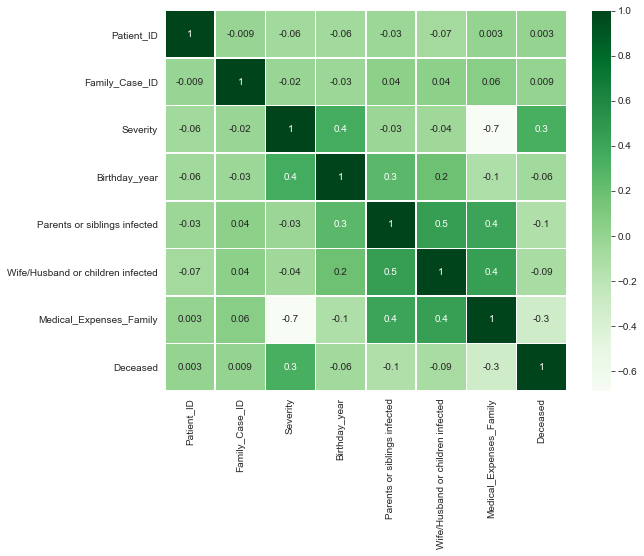

In [97]:
# Checking the correlation between variables
corr = train.corr(method='spearman')

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='Greens', linewidths=.5, fmt='.1g')

**Interpretation**

Assuming a 0.8 threshold no variables are correlated with each other.

The following looks at how different variables are distributed. <br>


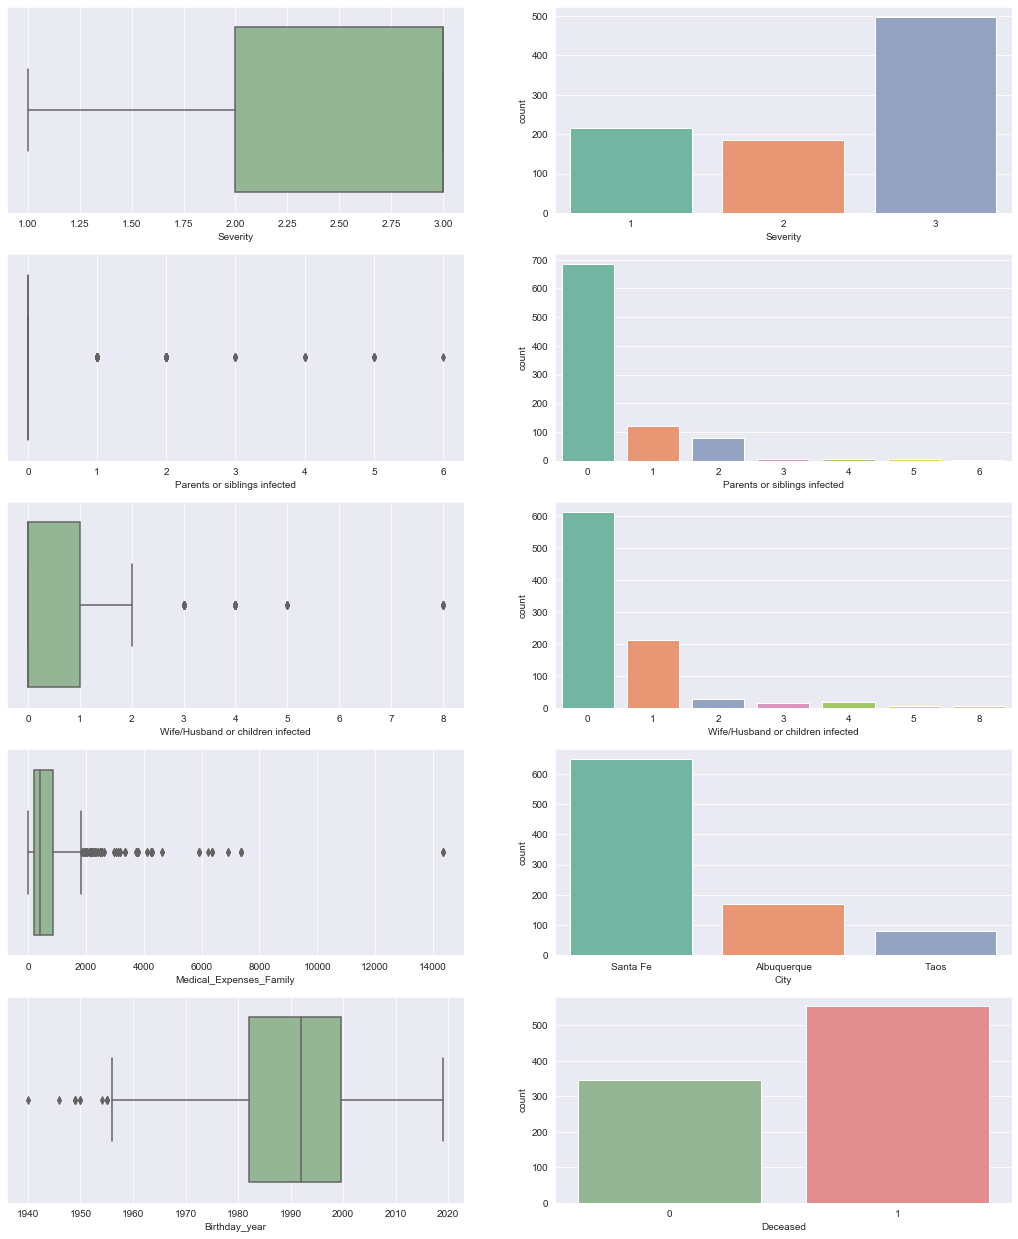

In [99]:
sns.set_style("darkgrid")
palette = ['darkseagreen', 'lightcoral']
sns.set_palette(palette)

f = plt.figure(figsize=(18, 22))
gs = f.add_gridspec(5, 2)

ax = f.add_subplot(gs[0, 0])
sns.boxplot(data=train, x='Severity', orient='h')

ax = f.add_subplot(gs[0, 1])
sns.countplot(x='Severity', data=train, palette=sns.color_palette("Set2"))

ax = f.add_subplot(gs[1, 0])
sns.boxplot(data=train, x='Parents or siblings infected',  orient='h')

ax = f.add_subplot(gs[1, 1])
sns.countplot(x='Parents or siblings infected', data=train, palette=sns.color_palette("Set2"))

ax = f.add_subplot(gs[2, 0])
sns.boxplot(data=train, x='Wife/Husband or children infected', orient='h')

ax = f.add_subplot(gs[2, 1])
sns.countplot(x='Wife/Husband or children infected', data=train, palette=sns.color_palette("Set2"))

ax = f.add_subplot(gs[3, 0])
sns.boxplot(data=train, x='Medical_Expenses_Family', orient='h')

ax = f.add_subplot(gs[3, 1])
sns.countplot(data=train, x='City', palette=sns.color_palette("Set2"))

ax = f.add_subplot(gs[4, 0])
sns.boxplot(data=train, x='Birthday_year',  orient='h')

ax = f.add_subplot(gs[4, 1])
sns.countplot(data=train, x='Deceased')

**Interpretation**

- `Severity` shows a stronger concentration of values between "2" and "3"
- `Birthday Year` seems fairly normally distributed with a few outliers
- `Parents or siblings infected`, `Wife/Husband or children infected` Boxplots are difficult to interpret as far as identification of outliers. For that reason only the most extreme values will be removed.
- `Medical_Expenses_Family` shows a skewed distribution and has a lot of values outside of the 'whiskers' of the Boxplot. These values can not be considered outliers. Plus, the dataset is really small and removing a lot of observations  makes it harder to train the model. For these reasons only the most extreme values will be removed.<br>
- `City` is dominated by "Santa Fe", while Albuquerque and Taos are significantly under-represented in the dataset
- `Deceased`shows a much bigger proportion of the dataset as 1 (being deceased). This shows an imbalanced classification problem and techniques to deal with this problem are going to be used (e.g. Oversampling).

**Conclusions that can be drawn from the exploration phase**

The data exploration phase revealed that missing values are high in birthday year and medical tent. Here the missing values could be imputed or deleted respectively in the upcoming modify step. Further, a generally low correlation between variables can be observed, which indicates possible difficulties to detect relationships between different variables, for example for merging suitable already existing features. In regards to the feature variables and the target variable both show imbalanced data, which has to be dealt with through sampling techniques.<br>
Therefore, the insights drawn will be applied in the following steps of this notebook.

## <font color='#E8800A'>Modifiy</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)<br>

### Removing outliers

The outliers are removed using a threshold.

Columns:
 * `Wife/Husband or children infected` - Values bigger than 6 will be removed.
 * `Medical_Expenses_Family` - Values bigger than 12000 will be removed.
 * `Birthday_year` - Values lower than 1943 will be removed.

In [31]:
train = train.loc[train['Wife/Husband or children infected'] <= 6]

train = train.loc[train['Medical_Expenses_Family'] <= 12000]

train = train.loc[(train['Birthday_year'] >= 1943) |
                  ((train['Birthday_year'].isna()))]

### Dropping Patient_ID and Medical_Tent column

For the model training we will not be needing the 'Patient_ID' Column.<br>
'Medical_Tent' column has a lot of missing values and for that reason it will be dropped.

In [32]:
train = train.drop(columns=["Patient_ID", "Medical_Tent"], axis=1)

### Changing Column Names

The columns names were wrong.

In [33]:
train = train.rename(columns={"Parents or siblings infected": "Parents or children infected",
                              "Wife/Husband or children infected": "Wife/Husband or siblings infected"})

### Changing Name Column with Gender

Name column didn´t bring any valuable general information for the classification task. This was replaced with the gender that was obtained by the first characters in the name string(Ms., Mrs., Miss, Mr., Master).

In [34]:
train['Name'] = train['Name'].str.replace('^(Ms.|Mrs.|Miss)', 'F').str[0]
train['Name'] = train['Name'].str.replace('^(Mr.|Master)', 'M').str[0]

train = train.rename(columns={"Name": "Gender"})

### Handling City Column Missing Values

City column had 2 missing values and they were imputed using the most frequent value. Since 2 observations is a really small percentage of the dataset, the imputing technique used here will not change the performance of the model.

In [35]:
# Imputing City column missing values with the most frequent

imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train['City'] = imp_mf.fit_transform(train[['City']]).ravel()

### One-hot encoding categorical variables

'Gender' and 'City' columns need to be one-hot encoded to be fed to the classifiers. Since gender and city values have no real order the one-hot encoding technique is the most correct one to use.

In [36]:
cat = ['Gender', 'City']

new_cat = [col for col in cat if col in train.columns]

train = pd.get_dummies(data=train, columns=new_cat)

### Separating feature and label variables

Since there are few records in the DataFrame we will be using **Cross Validation** to better estimate the results of our model instead of the typical train/test split.

In [37]:
X = train.drop(['Deceased'], axis=1)
y = train['Deceased']

### Handling Birthday_year Column Missing Values

'Birthday_year' Column Missing values will be dealt using a KNNImputer. This technique seems to us the most adequate one to be used in this situation. A KNeighborsRegressor was also attempted but after evaluation the R squared of the estimator we concluded that it wasn´t the best option since the R squared obtained was negative, which means that fitting an horizontal line to the observations would give better results.

In [38]:
# Imputing Birthday_year column using knn

knn_imp = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance')

data = knn_imp.fit_transform(X)

X = pd.DataFrame(data = data, columns = X.columns)

### Creating new variables

New variables were created in order to increase the score of the model.
 * `Medical_Expenses_Family/age` - The value spent by age.
 * `Severity/age` - The severity of the decease by age.
 * `Medical_Expenses_Family/Number_of_family_members` - The average expenses by family member. 

In [39]:
X['Medical_Expenses_Family/age'] = X['Medical_Expenses_Family']/calculateAge(X["Birthday_year"])

X['Severity/age'] = X['Severity']/calculateAge(X["Birthday_year"])

X['Medical_Expenses_Family/Number_of_family_members'] = X['Medical_Expenses_Family']/get_counts(X,'Family_Case_ID')

### Dropping Family_Case_ID

For the model training we will not be needing the 'Family_Case_ID' Column.

In [40]:
X = X.drop(columns=["Family_Case_ID"], axis=1)

### SMOTE 

Since the classes are imbalanced SMOTE will be used to balance the proportion of the target variable, making it easier to classify the minority class.

In [41]:
smote = SMOTE(random_state=150, k_neighbors=4)

X, y = smote.fit_resample(X, y)

### Feature Engineering

Feature Engineering will be used to test which variables are valuable to the model.

**Boruta**

**Algorithm Explanation**<br>
The Boruta algorithm supports the feature selection by finding important features of interest, which are needed to build a good model with good accuracy. It is a wrapper algorithm around Random Forest. It shuffles copies of all features to make the data more random.<br>
In the second step, it trains a Random Forest Classifier on the dataset (all features and their copies). Using Mean Decrease Accuracy it evaluates the importance of each feature. The higher it is the more important. <br>
Further, every iteration Boruta checks it the real feature has higher importance than any of its shadow features (using the z-score) and removes the features that are identified as unimportant. <br>
At last, the algorithm stops once all features are classified as rejected or accepted or if the Random Forest has a pre-defined limit of runs.<br>
https://www.analyticsvidhya.com/blog/2016/03/select-important-variables-boruta-package/

In [42]:
# Creating model
forest = RandomForestClassifier(
    n_jobs=-1, max_depth=5, class_weight='balanced', random_state=150)

# Define method
boruta = BorutaPy(estimator=forest,
                  n_estimators='auto',
                  random_state=150)

# Fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(X.values, y.values.ravel())

selected_features = pd.Series(boruta.support_, index=X.columns)
selected_features

Severity                                             True
Birthday_year                                        True
Parents or children infected                        False
Wife/Husband or siblings infected                    True
Medical_Expenses_Family                              True
Gender_F                                             True
Gender_M                                             True
City_Albuquerque                                    False
City_Santa Fe                                       False
City_Taos                                           False
Medical_Expenses_Family/age                          True
Severity/age                                         True
Medical_Expenses_Family/Number_of_family_members     True
dtype: bool

The variables that have a True value will be the ones selected to train final model.

**RFE**

RFE was also tested has a feature engineering technique but better results were obtained with the Borura technique. With this said, the results of Boruta  will be used for the final model.

In [43]:
# #no of features
# nof_list = range(1,len(X.columns))            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
    
#     model = RandomForestClassifier(
#     n_jobs=-1, max_depth=5, class_weight='balanced',random_state=150)

#     rfe = RFE(model, nof_list[n])
#     X_rfe = rfe.fit_transform(X, y)
    
#     # Cross Validation
#     cv_results = cross_validate(
#     model, X_rfe, y, cv=5, scoring=["accuracy"])
#     # Getting the acc
#     score = cv_results["test_accuracy"].mean()
    
#     score_list.append(score)
    
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

In [44]:
# model = RandomForestClassifier(n_jobs=-1, max_depth=5, class_weight='balanced')

In [45]:
# rfe = RFE(estimator=model, n_features_to_select=11)

In [46]:
# X_rfe = rfe.fit_transform(X=X, y=y)

In [47]:
# print(rfe.support_, X.columns)

**Removing non important features**

In [48]:
X = X.drop(['Parents or children infected', 'City_Albuquerque', 'City_Santa Fe',
       'City_Taos'], axis=1)

## <font color='#E8800A'>Model</font> <a class="anchor" id="nineth-bullet"></a>
  [Back to TOC](#toc)<br>

To select the best model that fits our data first we used the function best_scaler to understand what was the best scaler for a particular model. Note that it is important to set the same random_state value to all the models.

Models Tried:
 * MLPClassifier
 * SVC
 * RandomForestClassifier
 * KneighborsClassifier
 * GradientBoostingClassifier
 * BaggingClassifier using all other models as base estimators


(               Accuracy
 MinMax (-1,1)  0.831532
 MinMax (0,1)   0.832445
 Standard       0.830615
 Robust         0.831528
 No Scaler      0.832445,
 <module 'seaborn' from 'C:\\Users\\nunoa\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>)

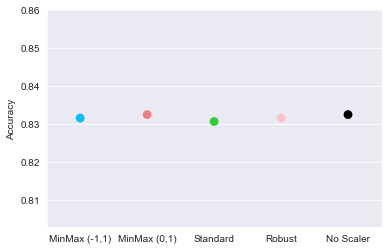

In [49]:
# model = MLPClassifier(random_state=150)

# model = SVC(random_state=150)

model = RandomForestClassifier(random_state=150)

# model = KNeighborsClassifier()   

# model = GradientBoostingClassifier(random_state = 150)

# model = BaggingClassifier(base_estimator = model, random_state = 150)

best_scaler(model, X, y)

The **RandomForestClassifier** using Min Max Scaler with feature range from 0 to 1 was the one that gave the best results.

A **GridSearchCV** was used to see the best combination of parameters for each of the models.

Each result was compared to the best previous one.

Below are all the combinations of parameters tried for each estimator. 

In [53]:
#MLP Classifier
# parameter_space = {
#     'hidden_layer_sizes': [(100), (50, 50), (100, 100), (100, 100,100), (100,200,300), (100, 200, 100)],
#     'activation': ['relu', 'tahn', 'logistic'],
#     'solver': ['adam', 'sgd', 'lbfgs'],
#     'learning_rate_init': np.linspace(0.001, 0.01, 10),
#     'learning_rate': ['adaptive', 'constant', 'invscaling'],
#     'batch_size': [100, 200],
#     'max_iter': [100, 150, 200]
# }

#SVC
# parameter_space = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto' ],
#     'class_weight': [None, 'balanced']
# }

#RF
# parameter_space = {
#     'n_estimators': [100, 70, 60, 50, 40],
#     'criterion': ['entropy', 'gini'],
#     'max_depth': [None, 7, 8, 10, 11, 12, 13, 15],
#     'min_samples_split': [2, 3, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 5, 10, 15],
#     'max_leaf_nodes': [None, 10, 20, 30],
#     'max_features': ['auto', 'sqrt', 'log2', 0.8, 0.7, 0.6, 0.5],
#     'class_weight': ['balanced', 'balanced_subsample'],
#     'min_impurity_decrease': np.linspace(0.0, 0.02, 30),
#     'ccp_alpha': np.linspace(0.0, 0.0005, 1000)
# }

#KNN
# parameter_space = {
#     'n_neighbors': [3, 5, 10, 12, 15],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': [15, 20, 30, 40]
# }

#GBC
# parameter_space = {
#     'loss': ['deviance', 'exponential'],
#     'n_estimators': [100, 50],
#     'criterion': ['friedman_mse', 'mse', 'mae'],
#     'learning_rate': [0.1, 0.5],
#     'max_depth': [None, 8, 20],
#     'min_samples_split': [1, 3],
#     'min_samples_leaf': [1, 3],
#     'max_leaf_nodes': [None],
#     'max_features': [None, 0.5],
#     'min_impurity_decrease': [0.0]
# }

# clf = GridSearchCV(model, parameter_space, cv=5)

# scaler = MinMaxScaler().fit(X)

# scaler_X = scaler.transform(X)

# clf.fit(scaler_X, y)

# print(clf.best_params_)

# print(clf.best_score_)

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 13, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 40}
0.848008043232374


The **RandomForestClassifier** gave the best results not only with standard parameters but with tuning.

## <font color='#E8800A'>Assess</font> <a class="anchor" id="tenth-bullet"></a>
  [Back to TOC](#toc)<br>

In [87]:
model_final = RandomForestClassifier(class_weight='balanced', 
                                     criterion='entropy', 
                                     max_depth=13, 
                                     max_features=0.5, 
                                     max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, 
                                     min_samples_leaf=1, 
                                     min_samples_split=3, 
                                     n_estimators=40) 

scaler = MinMaxScaler().fit(X)

scaler_X = scaler.transform(X)

model_final.fit(scaler_X, y)

cv_results = cross_validate(model_final, scaler_X, y, cv=10, scoring=["accuracy"])

accuracy_scaler = cv_results["test_accuracy"].mean()

print(accuracy_scaler)

0.8498081734778984


---

## <font color='#E8800A'>Predicting Test set</font> <a class="anchor" id="eleventh-bullet"></a>
  [Back to TOC](#toc)<br>

In [88]:
test = pd.read_csv("test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         400 non-null    int64  
 1   Family_Case_ID                     400 non-null    int64  
 2   Severity                           400 non-null    int64  
 3   Name                               400 non-null    object 
 4   Birthday_year                      318 non-null    float64
 5   Parents or siblings infected       400 non-null    int64  
 6   Wife/Husband or children infected  400 non-null    int64  
 7   Medical_Expenses_Family            400 non-null    int64  
 8   Medical_Tent                       89 non-null     object 
 9   City                               400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


In [89]:
# modify

ID = test['Patient_ID']

test = test.drop(columns=["Patient_ID", "Medical_Tent"], axis=1)

# Changing column names

test = test.rename(columns={"Parents or siblings infected": "Parents or children infected",
                            "Wife/Husband or children infected": "Wife/Husband or siblings infected"})

test['Name'] = test['Name'].str.replace('^(Ms.|Mrs.|Miss)', 'F').str[0]
test['Name'] = test['Name'].str.replace('^(Mr.|Master)', 'M').str[0]

test = test.rename(columns={"Name": "Gender"})

cat = ['Gender', 'City']

new_cat = [col for col in cat if col in test.columns]

test = pd.get_dummies(data=test, columns=new_cat)

data_test = knn_imp.transform(test)

test = pd.DataFrame(data = data_test, columns = test.columns)

test['Medical_Expenses_Family/age'] = test['Medical_Expenses_Family']/calculateAge(test["Birthday_year"])
test['Severity/age'] = test['Severity']/calculateAge(test["Birthday_year"])
test['Medical_Expenses_Family/Number_of_family_members'] = test['Medical_Expenses_Family']/get_counts(test,'Family_Case_ID')

test = test.drop(['Family_Case_ID', 'Parents or children infected', 'City_Albuquerque', 'City_Santa Fe',
       'City_Taos'], axis=1)

to_predict = scaler.transform(test)

# Predictions

predictions = model_final.predict(to_predict)

# Final dataframe

dataframe = pd.DataFrame()

dataframe['Patient_ID'] = ID
dataframe['Deceased'] = predictions

dataframe.to_csv("Predictions\\Group21_VersionX.csv", index=False)

---

# Important notice

The final model predictions corresponds to the Group21_Version29.csv on kaggle.